In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('./datasets/train.csv')

In [3]:
train.shape

(2051, 81)

In [4]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [5]:
#renaming all columns to lowercase/replacing spaces with '_' for consistency
train.columns = [x.lower().replace(' ','_') for x in train.columns]

In [6]:
train.head(1)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


# Handling Null Values:

Columns with a high count of null values:

1) pool_qc - Pool Quality - Ordinal (2042 null values)
   -> Pool QC is non-null only in rows where Pool Area is also non-null.
   This column will be **dropped**. Pool QC is dependent on Pool Area        being a non-null value. While there    are only a limited number of      datapoints that have pools.
   
2) pool_area - This will also be dropped, as 2042 datapoints do not have    pools.
   
2) misc_feature - Nominal (1986 null values)
   -> This column will be **dropped**, as there isn't a lot of              information    on    Misc Features and majority (97%) of these data      points are left blank.

3) alley - Alley Access Type - Nominal (1911 null values)
   -> This column will be **dropped**, as a large proportion (93%) of the    total dataset is recorded as Null - No Alley Access
   
4) fence - Fence Quality - Ordinal (1651 null values)
   -> This column will **dropped**, as only about 20% of datapoints have
   this value as a non-null.
   
5) fireplace_qu - Fireplace Quality - Ordinal (1000 null values)
    -> This column will not be dropped yet, but instead go through
    ordinal encoding.

In [7]:
#sorting the columns with the highest number of null values in
#descending order
train.isnull().sum().sort_values(axis=0, ascending=False).head(20)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
dtype: int64

In [8]:
train['pool_area'].replace(0,np.nan, inplace=True)
train['pool_area'].isnull().value_counts()

True     2042
False       9
Name: pool_area, dtype: int64

In [9]:
#Checking that non-null rows of Pool Area are the same non-null rows of
#Pool QC so that we know  they correspond to each other
train[(train['pool_area'] != np.nan)][['pool_area','pool_qc']]

,pool_area,pool_qc
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
2046,NaN,NaN
2047,NaN,NaN
2048,NaN,NaN
2049,NaN,NaN


In [10]:
#dropping Misc Feature and Alley columns
train.drop(columns=['misc_feature','alley', 'pool_qc', 'pool_area', 'pid', 'fence'], inplace=True)

# Ordinal Encoding for Ordinal Features

**FEATURES THAT NEED TO BE ORDINALLY ENCODED:**



In [11]:
#ORDINAL ENCODING FOR COL: LOT SHAPE
lotshape_ordinal = {'Reg': 4,
                    'IR1': 3,
                    'IR2': 2,
                    'IR3': 1}

train['lot_shape'] = train['lot_shape'].apply(lambda x:
                                              lotshape_ordinal[x] 
                                              if x in lotshape_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: UTILITIES
utilities_ordinal = {'AllPub':4,
                     'NoSwer':3,
                     'NoSeWa':2,
                     'ELO':1}

train['utilities'] = train['utilities'].apply(lambda x:
                                              utilities_ordinal[x] 
                                              if x in utilities_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: UTILITIES
landslope_ordinal = {'Gtl':3,
                     'Mod':2,
                     'Sev':1}

train['land_slope'] = train['land_slope'].apply(lambda x:
                                                landslope_ordinal[x] 
                                                if x in landslope_ordinal 
                                                else np.nan)

#ORDINAL ENCODING FOR COL: OVERALL QUAL & OVERAL COND NOT NECESSARY
#AS ALREADY RANKED

#ORDINAL ENCODING FOR COL: EXTER QUAL
exterqual_ordinal = {'Ex':5,
                     'Gd':4,
                     'TA':3,
                     'Fa':2,
                     'Po':1}

train['exter_qual'] = train['exter_qual'].apply(lambda x:
                                                exterqual_ordinal[x] 
                                                if x in exterqual_ordinal 
                                                else np.nan)


#ORDINAL ENCODING FOR COL: EXTER COND
extercond_ordinal = {'Ex':5,
                     'Gd':4,
                     'TA':3,
                     'Fa':2,
                     'Po':1}

train['exter_cond'] = train['exter_cond'].apply(lambda x:
                                                extercond_ordinal[x] 
                                                if x in extercond_ordinal 
                                                else np.nan)

#ORDINAL ENCODING FOR COL: BSMT QUAL, NA TO RESULT IN 0
bsmtqual_ordinal = {'Ex':5,
                    'Gd':4,
                    'TA':3,
                    'Fa':2,
                    'Po':1,
                    'NA':0}

train['bsmt_qual'] = train['bsmt_qual'].apply(lambda x:
                                              bsmtqual_ordinal[x] 
                                              if x in bsmtqual_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: BSMT COND, NA TO RESULT IN 0
bsmtcond_ordinal = {'Ex':5,
                    'Gd':4,
                    'TA':3,
                    'Fa':2,
                    'Po':1,
                    'NA':0}

train['bsmt_cond'] = train['bsmt_cond'].apply(lambda x:
                                              bsmtcond_ordinal[x] 
                                              if x in bsmtcond_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: BSMT EXPOSURE, NA TO RESULT IN 0
bsmtexposure_ordinal = {'Gd':4,
                        'Av':3,
                        'Mn':2,
                        'No':1,
                        'NA':0}

train['bsmt_exposure'] = train['bsmt_exposure'].apply(lambda x:
                                              bsmtexposure_ordinal[x] 
                                              if x in bsmtexposure_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: BSMTFIN, NA TO RESULT IN 0
bsmtfin_ordinal = {'GLQ':6,
                   'ALQ':5,
                   'BLQ':4,
                   'Rec':3,
                   'LwQ':2,
                   'Unf':1,
                   'NA':0}

train['bsmtfin_type_1'] = train['bsmtfin_type_1'].apply(lambda x:
                                                        bsmtfin_ordinal[x] 
                                                        if x in bsmtfin_ordinal 
                                                        else np.nan)


#ORDINAL ENCODING FOR COL: BSMTFINTYPE 2, NA TO RESULT IN 0
bsmtfintype2_ordinal = {'GLQ':6,
                        'ALQ':5,
                        'BLQ':4,
                        'Rec':3,
                        'LwQ':2,
                        'Unf':1,
                        'NA':0}

train['bsmtfin_type_2'] = train['bsmtfin_type_2'].apply(lambda x:
                                              bsmtfintype2_ordinal[x] 
                                              if x in bsmtfintype2_ordinal 
                                              else np.nan)


#ORDINAL ENCODING FOR COL: HEATINGQC
heatingqc_ordinal = {'Ex':5,
                     'Gd':4,
                     'TA':3,
                     'Fa':2,
                     'Po':1}
                    
train['heating_qc'] = train['heating_qc'].apply(lambda x:
                                              heatingqc_ordinal[x] 
                                              if x in heatingqc_ordinal
                                              else np.nan)

#ORDINAL ENCODING FOR COL: ELECTRICAL
elec_ordinal = {'SBrkr':5,
                'FusaA':4,
                'FuseF':3,
                'FuseP':2,
                'Mix':1}
                    
train['electrical'] = train['electrical'].apply(lambda x:
                                                elec_ordinal[x] 
                                                if x in elec_ordinal
                                                else np.nan)

#ORDINAL ENCODING FOR COL: KitchenQual
kitchenqual_ordinal = {'Ex':5,
                       'Gd':4,
                       'TA':3,
                       'Fa':2,
                       'Po':1}
                    
train['kitchen_qual'] = train['kitchen_qual'].apply(lambda x:
                                                  kitchenqual_ordinal[x] 
                                                  if x in kitchenqual_ordinal
                                                  else np.nan)

#ORDINAL ENCODING FOR COL: FUNCTIONAL
homefunctlty_ordinal = {'Typ':8,
                        'Min1':7,
                        'Min2':6,
                        'Mod':5,
                        'Maj1':4,
                        'Maj2':3,
                        'Sev':2,
                        'Sal':1}
                    
train['functional'] = train['functional'].apply(lambda x:
                                                homefunctlty_ordinal[x] 
                                                if x in homefunctlty_ordinal
                                                else np.nan)

#ORDINAL ENCODING FOR COL: FIREPLACEQU, NA TO RESULT IN 0
fireplacequal_ordinal = {'Ex':5,
                        'Gd':4,
                        'TA':3,
                        'Fa':2,
                        'Po':1,
                        'NA':0}

train['fireplace_qu'] = train['fireplace_qu'].apply(lambda x:
                                                  fireplacequal_ordinal[x] 
                                                  if x in fireplacequal_ordinal 
                                                  else np.nan)


#ORDINAL ENCODING FOR COL: GARAGE FINISH, NA TO RESULT IN 0
garagefinish_ordinal = {'Fin':3,
                        'RFn':2,
                        'Unf':1,
                        'NA':0}

train['garage_finish'] = train['garage_finish'].apply(lambda x:
                                                      garagefinish_ordinal[x] 
                                                      if x in garagefinish_ordinal 
                                                      else np.nan)


#ORDINAL ENCODING FOR COL: GARAGE QUAL, NA TO RESULT IN 0
garagequal_ordinal = {'Ex':5,
                      'Gd':4,
                      'TA':3,
                      'Fa':2,
                      'Po':1,
                      'NA':0}

train['garage_qual'] = train['garage_qual'].apply(lambda x:
                                              garagequal_ordinal[x] 
                                              if x in garagequal_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: GARAGE COND, NA TO RESULT IN 0
garagecond_ordinal = {'Ex':5,
                      'Gd':4,
                      'TA':3,
                      'Fa':2,
                      'Po':1,
                      'NA':0}

train['garage_cond'] = train['garage_cond'].apply(lambda x:
                                                  garagecond_ordinal[x] 
                                                  if x in garagecond_ordinal 
                                                  else np.nan)

#ORDINAL ENCODING FOR COL: PAVED DRIVE, NA TO RESULT IN 0
paveddrive_ordinal = {'Y':2,
                      'P':1,
                      'N':0}

train['paved_drive'] = train['paved_drive'].apply(lambda x:
                                                  paveddrive_ordinal[x] 
                                                  if x in paveddrive_ordinal 
                                                  else np.nan)


# Handling Outliers

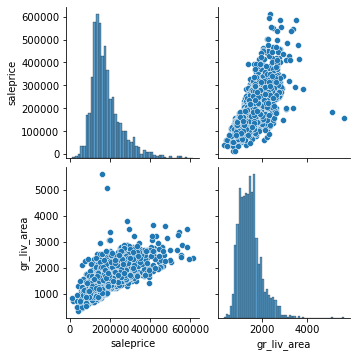

In [12]:
#plotting Sale Price against Ground living area in square feet
saleprice_grlivarea = train[['saleprice','gr_liv_area']]
sns.pairplot(saleprice_grlivarea);

In [13]:
#Filtering for and removing houses with more than 4000 sqft - outliers
train[train['gr_liv_area']>4000]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,60,RL,313.0,63887,Pave,1,Bnk,4.0,Corner,...,214,292,0,0,0,0,1,2008,New,160000
1885,2181,20,RL,128.0,39290,Pave,3,Bnk,4.0,Inside,...,546,484,0,0,0,17000,10,2007,New,183850


In [14]:
#dropping outliers from above
train.drop(train.index[[960,1885]], inplace=True)

In [15]:
train

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,NaN,13517,Pave,3,Lvl,4.0,CulDSac,...,0,44,0,0,0,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,3,Lvl,4.0,CulDSac,...,0,74,0,0,0,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,4,Lvl,4.0,Inside,...,0,52,0,0,0,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,4,Lvl,4.0,Inside,...,100,0,0,0,0,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,3,Lvl,4.0,Inside,...,0,59,0,0,0,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,20,RL,79.0,11449,Pave,3,HLS,4.0,Inside,...,0,276,0,0,0,0,1,2008,WD,298751
2047,785,30,RL,NaN,12342,Pave,3,Lvl,4.0,Inside,...,158,0,0,0,0,0,3,2009,WD,82500
2048,916,50,RL,57.0,7558,Pave,4,Bnk,4.0,Inside,...,0,0,0,0,0,0,3,2009,WD,177000
2049,639,20,RL,80.0,10400,Pave,4,Lvl,4.0,Corner,...,0,189,140,0,0,0,11,2009,WD,144000


In [16]:
#replacing null values with 0s
train.replace(np.nan, 0, inplace=True)

In [17]:
train.isnull().sum()

id              0
ms_subclass     0
ms_zoning       0
lot_frontage    0
lot_area        0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 75, dtype: int64

## EDA SECTION ##

In [18]:
train.to_csv('./datasets/train_cleaned.csv')

In [19]:
train.shape 

(2049, 75)

**BOXPLOTS & COUNTPLOTS FOR NOMINAL FEATURES**

**MS SubClass (Nominal)**: Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [20]:
# def subplot_histo_count_plot(dataframe, list_of_columns):
#     for col in list_of_columns:
#         fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
#         sns.boxplot(dataframe[col], orient='v', ax=ax[0])
#         sns.countplot(data = dataframe[col], ax=ax[1])
#     return plt.show()

/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


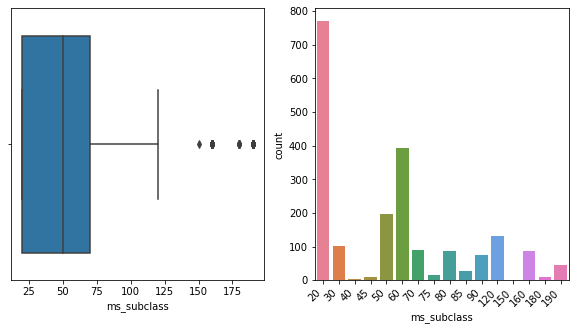

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(train['ms_subclass'], ax=ax[0]);
cp_mssub = sns.countplot(x="ms_subclass", data=train, palette="husl");
cp_mssub.set_xticklabels(cp_mssub.get_xticklabels(), rotation=45, ha="right");

**MS Zoning (Nominal)**: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

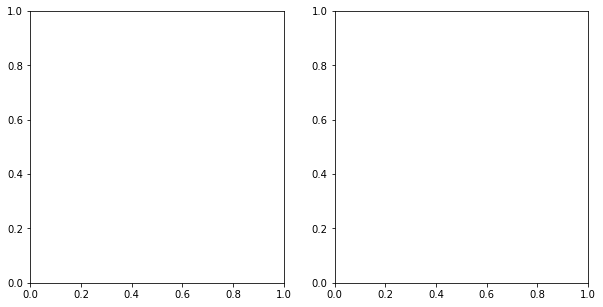

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(train['ms_zoning'], orient='h', ax=ax[0]);
sns.countplot(x="ms_zoning", data=train, ax=ax[1]);

/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

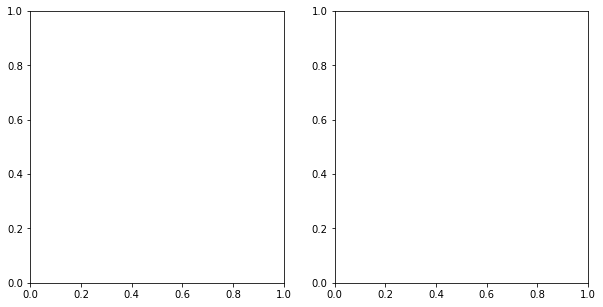

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(train['street'], ax=ax[0]);
sns.countplot(x="street", data=train, palette="husl");

**Land Contour (Nominal)**: Flatness of the property

Lvl	Near Flat/Level	
Bnk	Banked - Quick and significant rise from street grade to                               building
HLS	Hillside - Significant slope from side to side
Low	Depression
		

/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

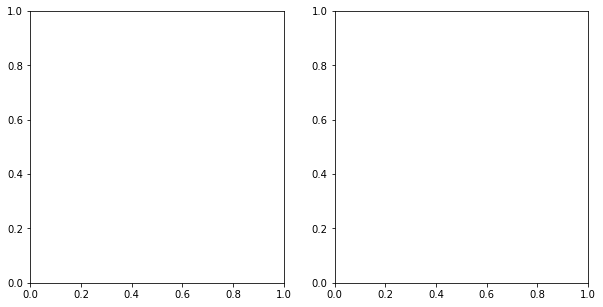

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(train['land_contour'], ax=ax[0]);
sns.countplot(x="land_contour", data=train, palette="husl");

**Lot Config (Nominal)**: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

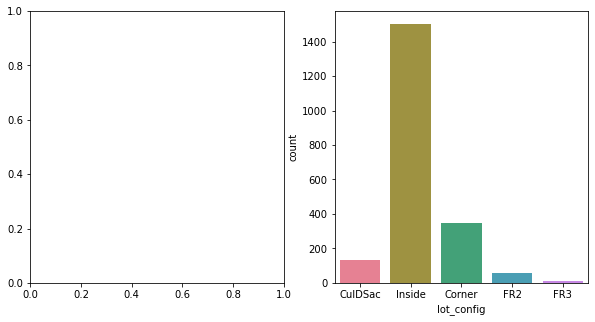

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(x="lot_config", data=train, palette="husl");

**Neighborhood (Nominal)**: Physical locations within Ames city limits (map available)

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       Greens	Greens
       GrnHill	Green Hills
       IDOTRR	Iowa DOT and Rail Road
       Landmrk	Landmark
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

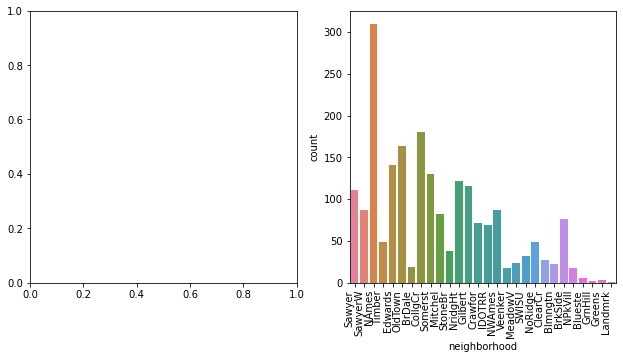

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
gr2 = sns.countplot(x="neighborhood", data=train, palette="husl");
gr2.set_xticklabels(gr2.get_xticklabels(), rotation=90, ha="right");

**Condition 1 (Nominal)**: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

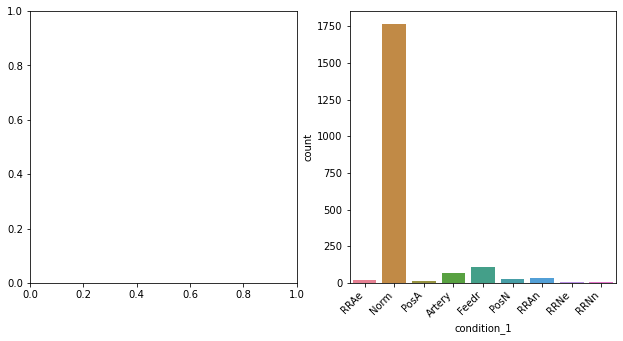

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
gr2 = sns.countplot(x="condition_1", data=train, palette="husl");
gr2.set_xticklabels(gr2.get_xticklabels(), rotation=45, ha="right");

**Condition 2 (Nominal)**: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

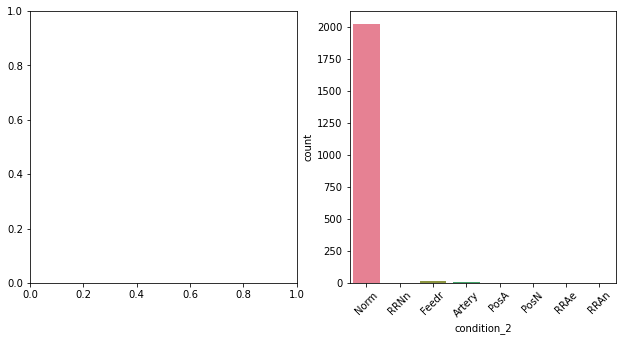

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
gr2 = sns.countplot(x="condition_2", data=train, palette="husl");
gr2.set_xticklabels(gr2.get_xticklabels(), rotation=45);

**House Style (Nominal)**: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

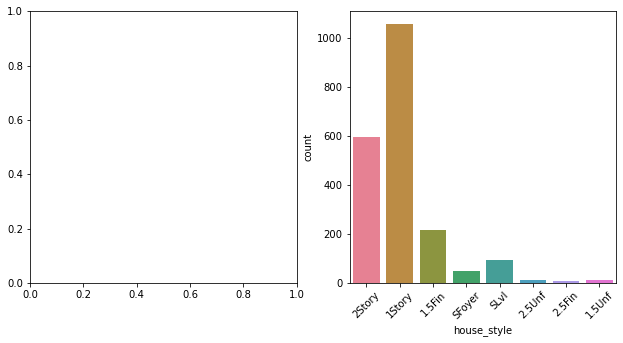

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
gr2 = sns.countplot(x="house_style", data=train, palette="husl");
gr2.set_xticklabels(gr2.get_xticklabels(), rotation=45);

**Roof Style (Nominal)**: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

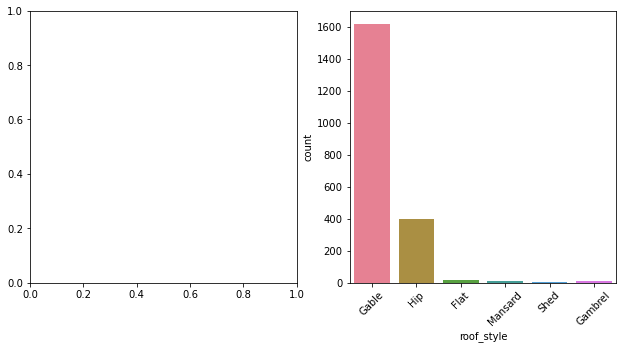

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
gr2 = sns.countplot(x="roof_style", data=train, palette="husl");
gr2.set_xticklabels(gr2.get_xticklabels(), rotation=45);

**Roof Matl (Nominal)**: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

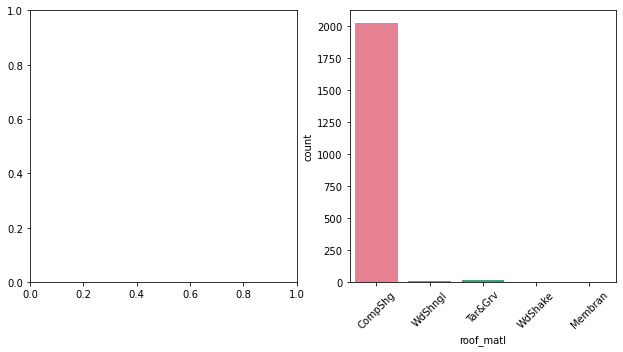

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
gr2 = sns.countplot(x="roof_matl", data=train, palette="husl");
gr2.set_xticklabels(gr2.get_xticklabels(), rotation=45);

**Exterior 1 (Nominal)**: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [33]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_

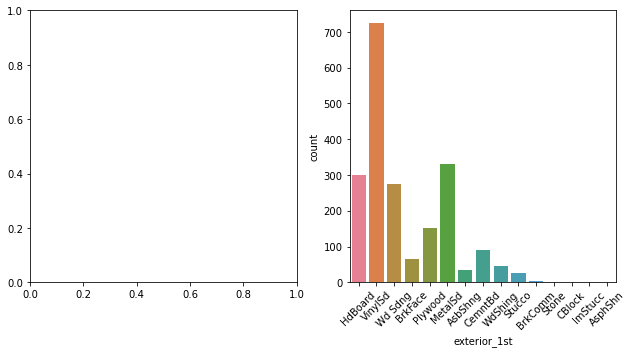

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
cp_ext1 = sns.countplot(x="exterior_1st", data=train, palette="husl");
cp_ext1.set_xticklabels(cp_ext1.get_xticklabels(), rotation=45);

**Exterior 2 (Nominal)**: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

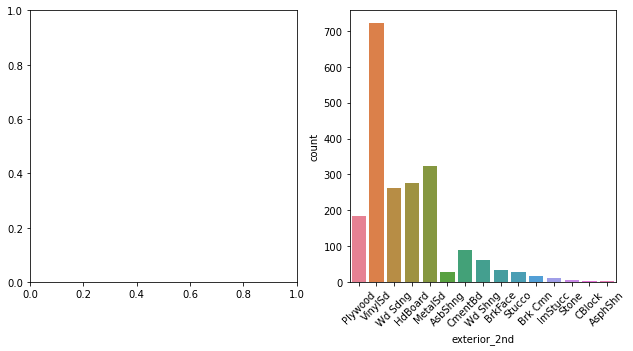

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
cp_ext2 = sns.countplot(x="exterior_2nd", data=train, palette="husl");
cp_ext2.set_xticklabels(cp_ext2.get_xticklabels(), rotation=45);

**Mas Vnr Type (Nominal)**: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

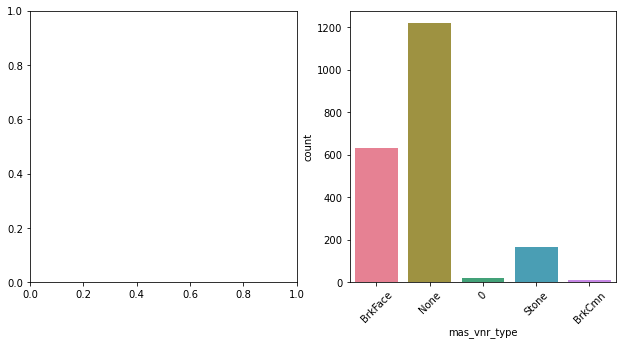

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
cp_masvnr = sns.countplot(x="mas_vnr_type", data=train, palette="husl");
cp_masvnr.set_xticklabels(cp_masvnr.get_xticklabels(), rotation=45);

**Foundation (Nominal)**: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

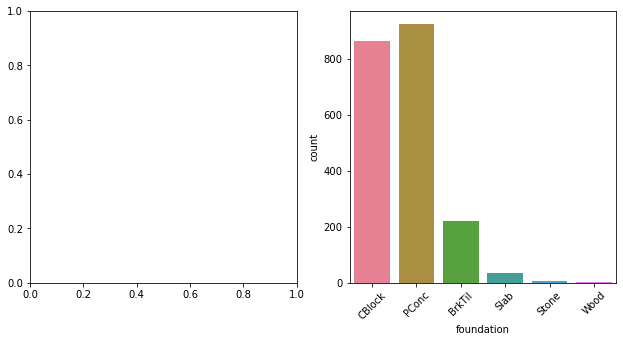

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
cp_foundation = sns.countplot(x="foundation", data=train, palette="husl");
cp_foundation.set_xticklabels(cp_foundation.get_xticklabels(), rotation=45);

**Central Air (Nominal)**: Central air conditioning

       N	No
       Y	Yes

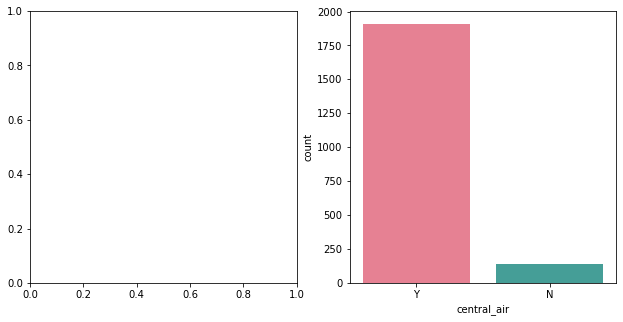

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
cp_ctrlair = sns.countplot(x="central_air", data=train, palette="husl")


**Garage Type (Nominal)**: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

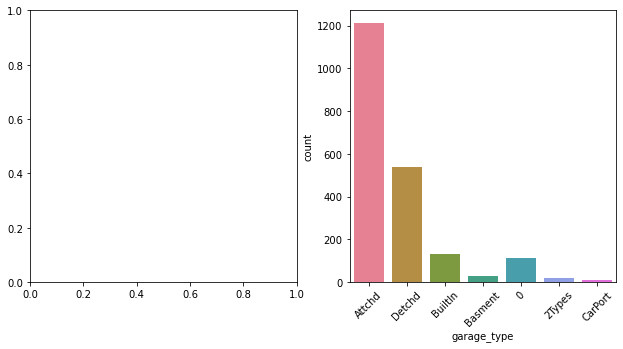

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
cp_grgtype = sns.countplot(x="garage_type", data=train, palette="husl")
cp_grgtype.set_xticklabels(cp_grgtype.get_xticklabels(), rotation=45);

**Sale Type (Nominal)**: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

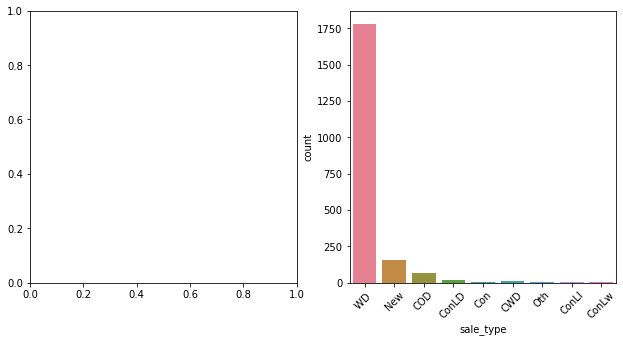

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
cp_saletype = sns.countplot(x="sale_type", data=train, palette="husl")
cp_saletype.set_xticklabels(cp_saletype.get_xticklabels(), rotation=45);

**Sale Condition (Nominal)**: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
		

In [49]:
train['overall_cond']

0       8
1       5
2       7
3       5
4       8
       ..
2046    5
2047    5
2048    6
2049    5
2050    5
Name: overall_cond, Length: 2049, dtype: int64

In [48]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_

ValueError: Could not interpret input 'sale_condition'

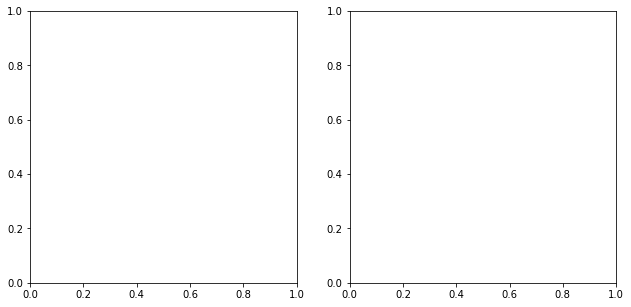

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 5))
cp_salecond = sns.countplot(x="sale_condition", data=train, palette="husl")
cp_salecond.set_xticklabels(cp_salecond.get_xticklabels(), rotation=45);